In [1]:
import pandas as pd

In [2]:
from ggplot import *
%matplotlib inline

In [3]:
ggplot?

In [4]:
surveys_complete = pd.read_csv('http://bit.ly/2nHHLz3', index_col=0)

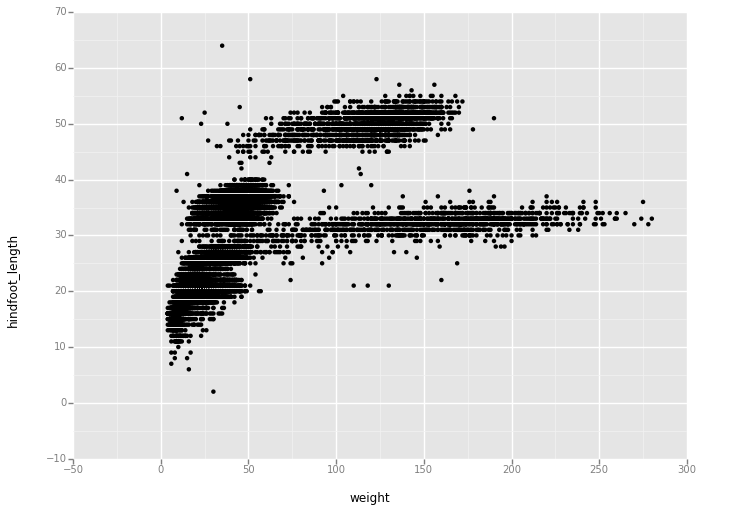

<ggplot: (-9223372036560653799)>

In [5]:
ggplot(aesthetics=aes(x='weight', y='hindfoot_length'), data=surveys_complete) + geom_point()

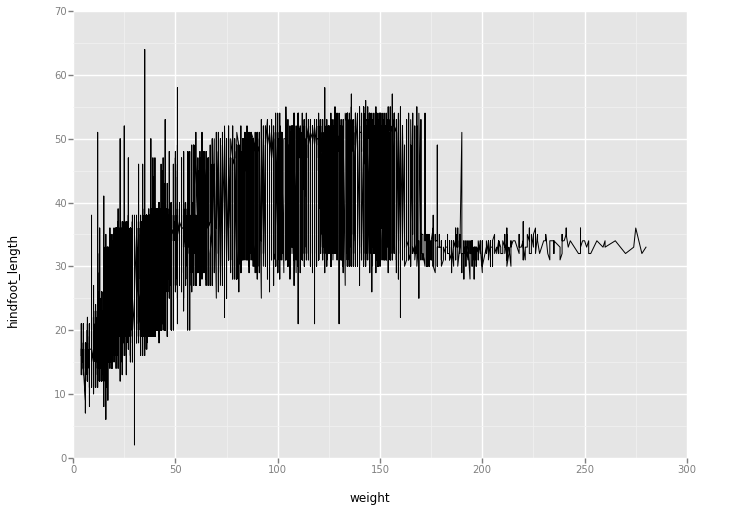

<ggplot: (293862597)>

In [9]:
ggplot(aesthetics=aes(x='weight', y='hindfoot_length'), data=surveys_complete) + geom_line()

/Users/kazmis/anaconda/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


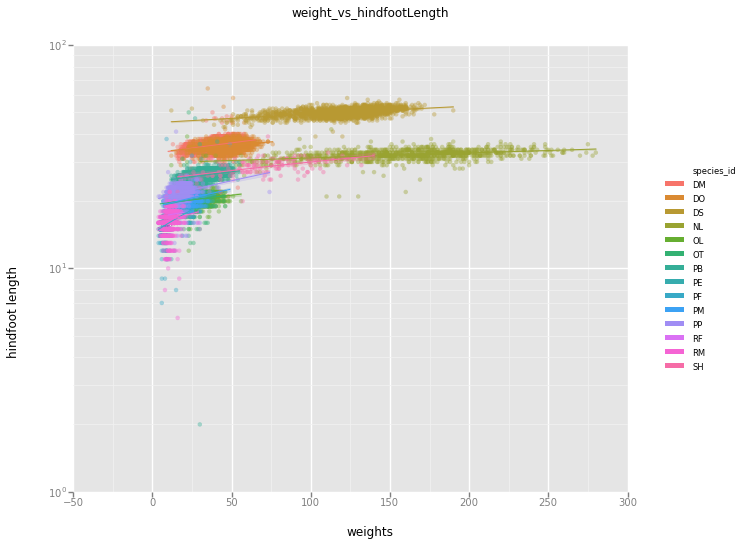

<ggplot: (-9223372036559974435)>

In [10]:
ggplot(aesthetics=aes(x='weight', y='hindfoot_length', color='species_id'), data=surveys_complete) + \
   geom_point(alpha=0.4) +\
   ggtitle("weight_vs_hindfootLength") +\
   xlab("weights") +\
   ylab("hindfoot length") +\
   stat_smooth(method='lm') +\
   scale_y_log(base=10)

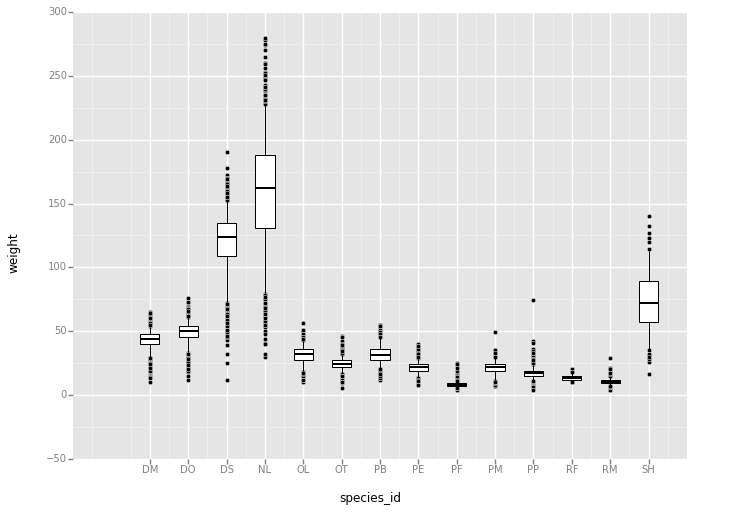

<ggplot: (-9223372036550420974)>

In [14]:
ggplot(aesthetics=aes(x='species_id', y='weight'), data=surveys_complete) + geom_boxplot()

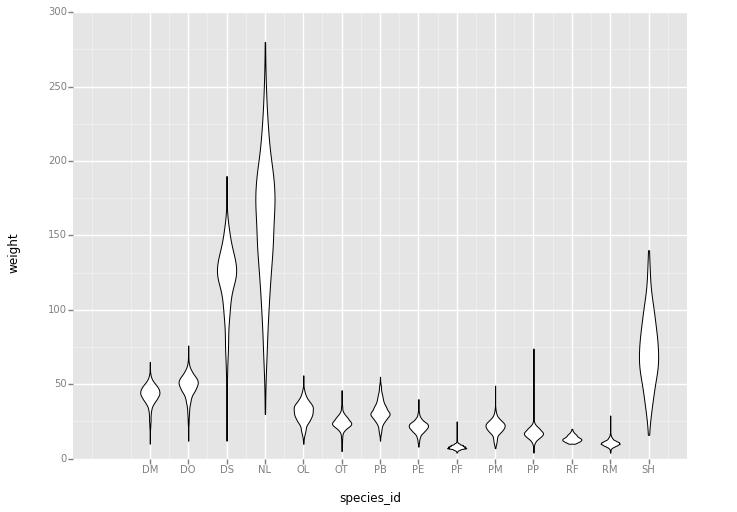

<ggplot: (303835133)>

In [16]:
ggplot(aesthetics=aes(x='species_id', y='weight'), data=surveys_complete) + geom_violin()

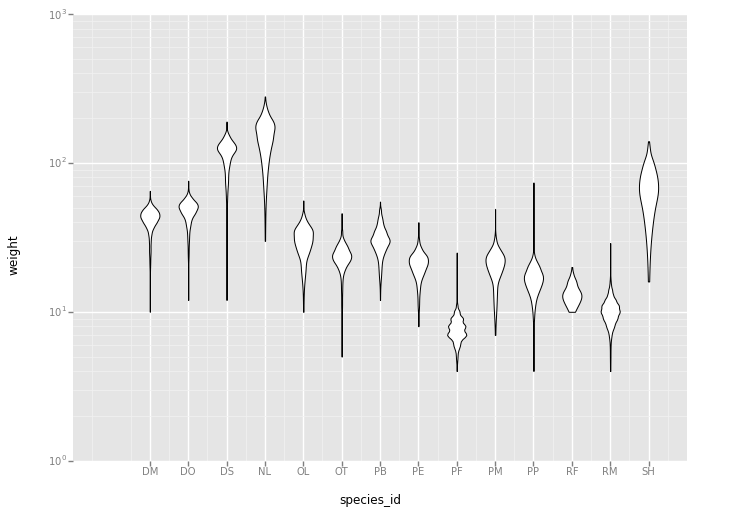

<ggplot: (-9223372036551565217)>

In [18]:
ggplot(aesthetics=aes(x='species_id', y='weight'), data=surveys_complete) + geom_violin() + scale_y_log(base=10)

### Challenge: To calculate number of counts per year

In [19]:
surveys_complete.head(2)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,plot_type
1,845,5,6,1978,2,NL,M,32,204,Neotoma,albigula,Rodent,Control
2,1164,8,5,1978,2,NL,M,34,199,Neotoma,albigula,Rodent,Control


In [35]:
yearly_counts = surveys_complete.groupby(['year','species_id'])['record_id'].count().reset_index()
yearly_counts.columns = ['year',"species_id","n"]

In [44]:
yearly_counts.head()

,year,species_id,n
0,1977,DM,181
1,1977,DO,12
2,1977,DS,29
3,1977,OL,1
4,1977,PE,2


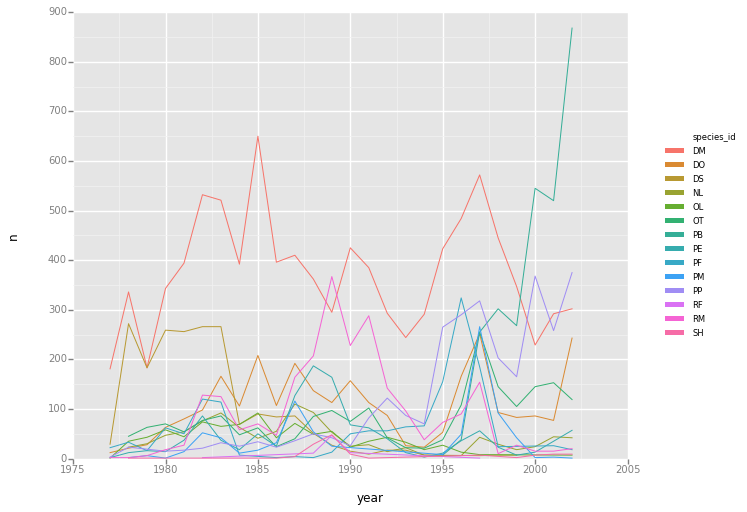

<ggplot: (-9223372036548482167)>

In [46]:
ggplot(aesthetics=aes(x='year', y='n', color='species_id'), data=yearly_counts) + geom_line()

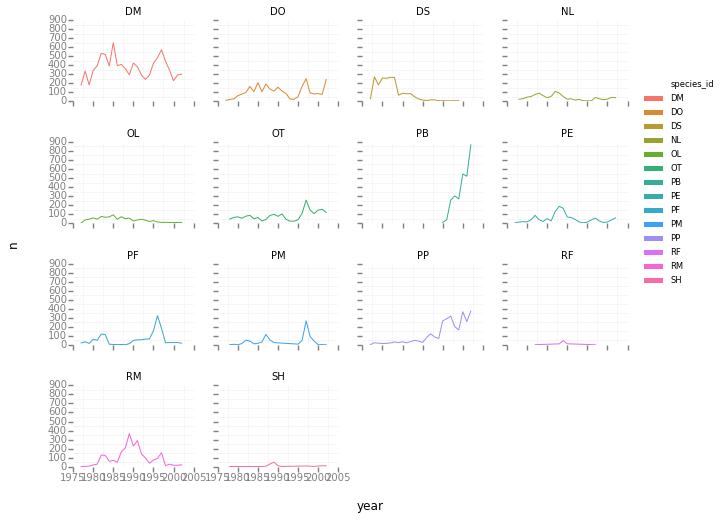

<ggplot: (306866191)>

In [51]:
ggplot(aesthetics=aes(x='year', y='n', color='species_id'), data=yearly_counts) + \
geom_line() + \
facet_wrap('species_id') + \
theme_bw()

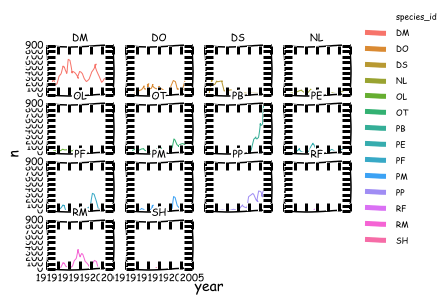

<ggplot: (307558713)>

In [52]:
ggplot(aesthetics=aes(x='year', y='n', color='species_id'), data=yearly_counts) + \
geom_line() + \
facet_wrap('species_id') + \
theme_xkcd()

## count per year per sex per species

In [55]:
yearly_counts = surveys_complete.groupby(['year','species_id', 'sex'])['record_id'].count().reset_index()
yearly_counts.columns = ["year","species_id", "sex", "n"]

In [56]:
yearly_counts.head()

,year,species_id,sex,n
0,1977,DM,F,75
1,1977,DM,M,106
2,1977,DO,F,10
3,1977,DO,M,2
4,1977,DS,F,18


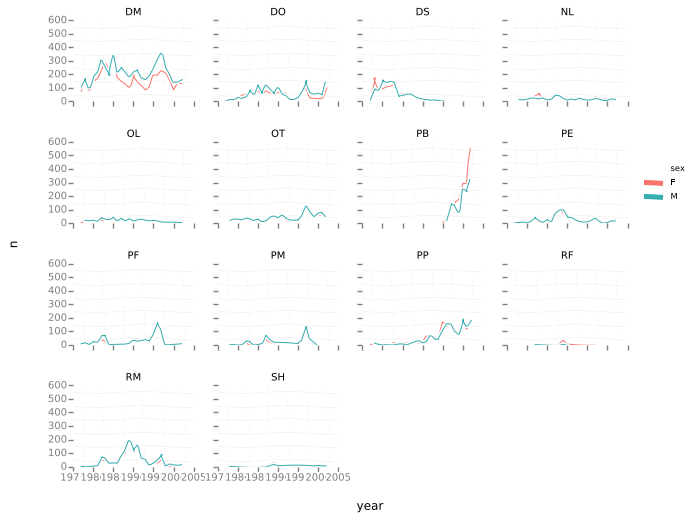

<ggplot: (309699406)>

In [61]:
ggplot(aesthetics=aes(x='year', y='n', color='sex'), data=yearly_counts) + \
geom_line() + \
facet_wrap('species_id') + \
theme_bw()

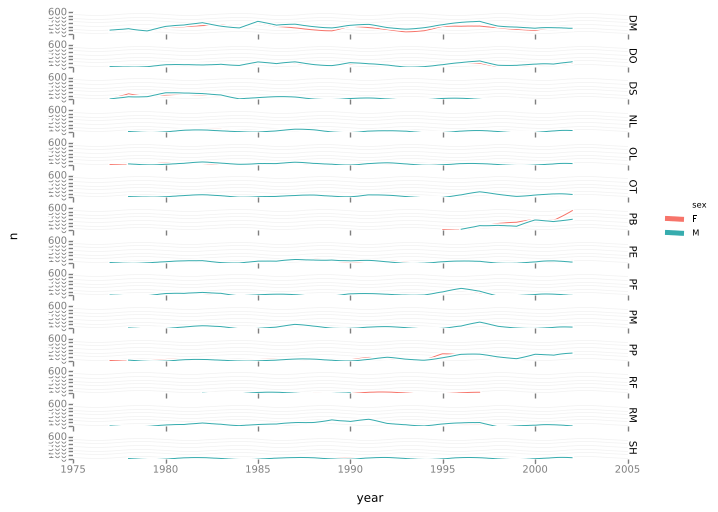

<ggplot: (-9223372036544619260)>

In [62]:
ggplot(aesthetics=aes(x='year', y='n', color='sex'), data=yearly_counts) + \
geom_line() + \
facet_grid('species_id') + \
theme_bw()

In [79]:
year_sex_weight = (surveys_complete[['species_id', 'year', 'weight', 'sex']]
    .groupby(['year', 'species_id', 'sex'])
    .mean()
    .reset_index())

In [80]:
year_sex_weight.head(2)

,year,species_id,sex,weight
0,1977,DM,F,40.213333
1,1977,DM,M,41.801887


In [81]:
year_sex_weight.columns=['year','species_id', 'sex', 'average_weight']

In [82]:
year_sex_weight.head(1)

,year,species_id,sex,average_weight
0,1977,DM,F,40.213333


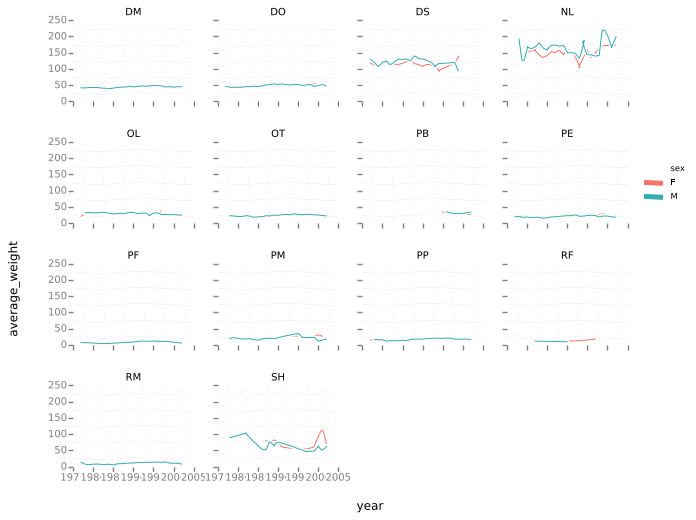

<ggplot: (311125473)>

In [83]:
ggplot(aesthetics=aes(x='year', y='average_weight', color='sex'), data=year_sex_weight) + \
geom_line() + \
facet_wrap('species_id') + \
theme_bw()